# **Wine Quality Prediction**

In this notebook, We’ll use the Wine Quality Dataset from the UCI Machine Learning Repository. This dataset can be used for unsupervised learning to explore and cluster different wine qualities based on physicochemical properties.

## 1. Problem Description

### 1.1 Goal

Perform clustering on the Wine Quality dataset to identify natural groupings of wines based on their physicochemical properties, without using the quality score initially.

### 1.2 Dataset

We will use the **Wine Quality Dataset** from the UCI Machine Learning Repository (gathered from public source URL: https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv)

- **Features**:
  - `fixed acidity`, `volatile acidity`, `citric acid`, `residual sugar`, `chlorides`, `free sulfur dioxide`, `total sulfur dioxide`, `density`, `pH`, `sulphates`, `alcohol`
- **Target**:
  - `quality`: Quality of the wine (scale from 0 to 10)

## 2. Exploratory Data Analysis (EDA)

### 2.1 Loading the Data

We'll start by loading and inspecting the dataset.


In [14]:
# Import necessary packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

# Load the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
df = pd.read_csv(url, sep=';')

# Display the first few rows of the dataset
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# Extensive data description
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### 2.2 Checking for Missing Values

Let's check if there are any missing values in the dataset.


In [4]:
# Check for missing values
df.isnull().sum()


,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


### 2.3 Handling Missing Values

If there are missing values, we will handle them by either imputing them with mean/median or dropping rows/columns with missing values.


In [5]:
# Check for missing values again to decide on the imputation strategy
missing_values = df.isnull().sum()

# Impute missing values with the median (if any)
df.fillna(df.median(), inplace=True)

# Verify that there are no more missing values
df.isnull().sum()


,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


### 2.4 Summary Statistics

We will now look at the summary statistics for the dataset.


In [6]:
# Summary statistics
df.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### 2.5 Distribution of Wine Quality

We'll visualize the distribution of features to help understand their characteristics.


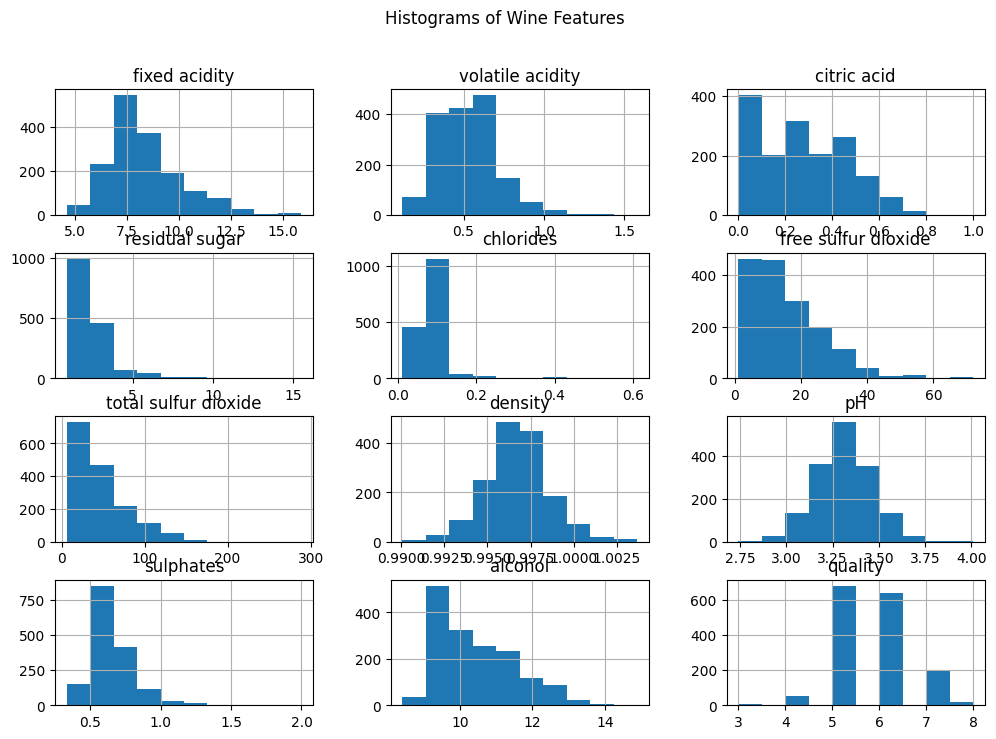

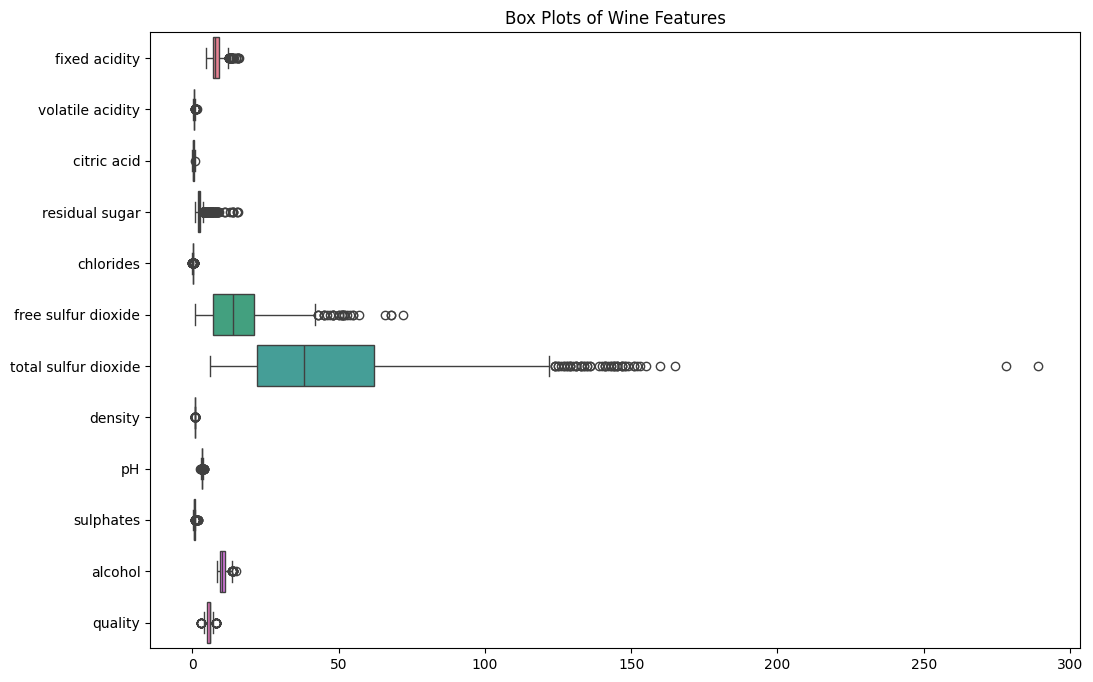

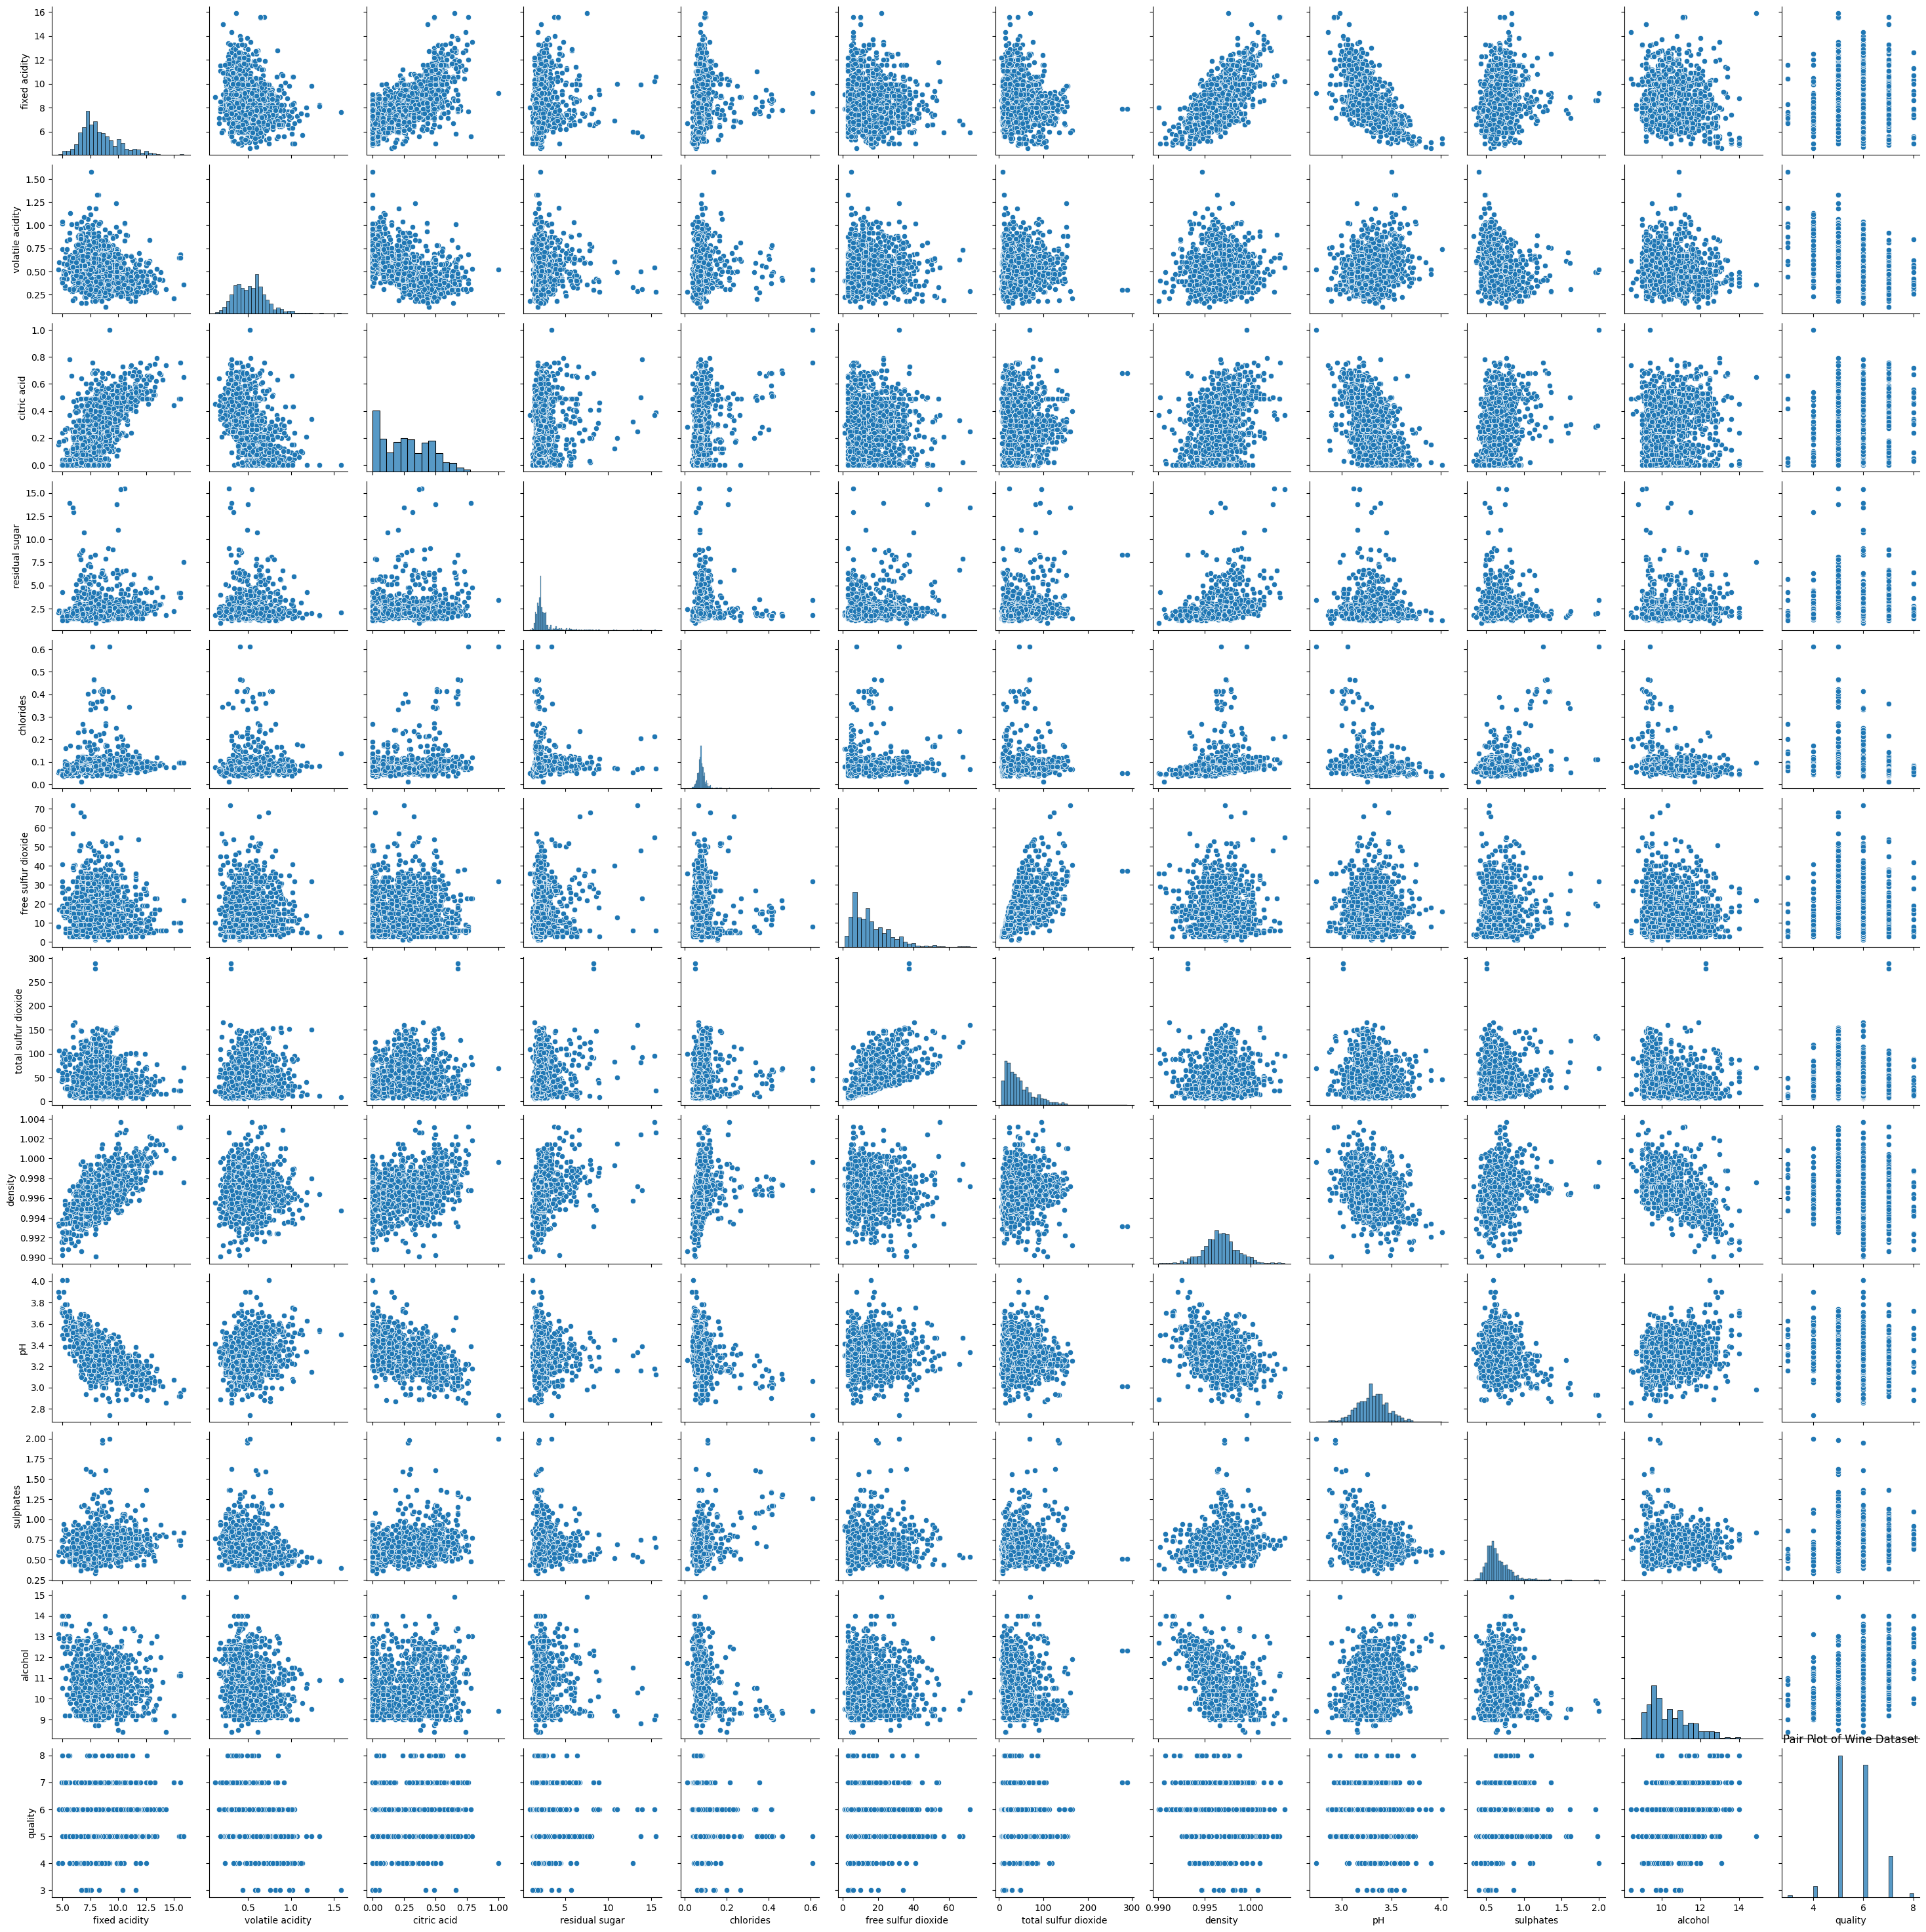

In [11]:
# Histograms
df.hist(bins=10, figsize=(12, 8))
plt.suptitle('Histograms of Wine Features')
plt.show()

# Box plots
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, orient="h")
plt.title('Box Plots of Wine Features')
plt.show()

# Pair plot to visualize relationships
sns.pairplot(df)
plt.title('Pair Plot of Wine Dataset')
plt.show()

### 2.6 Correlation

Understanding correlations between features helps identify potential relationships.


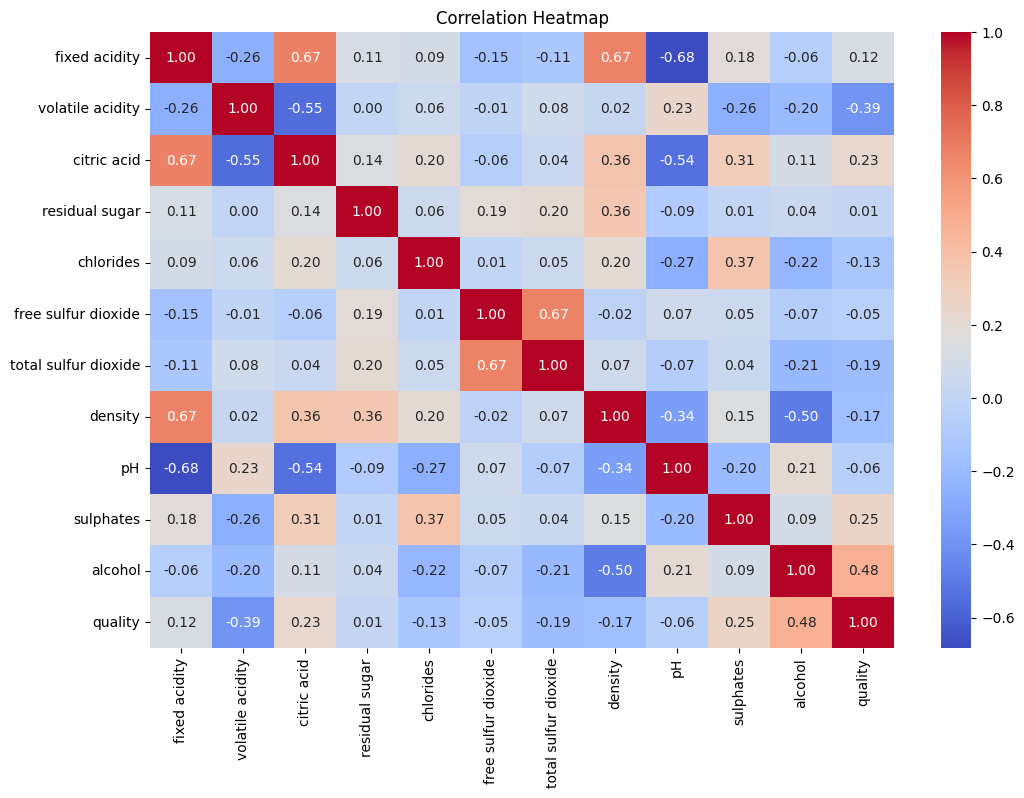

In [12]:

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


### 2.7 Data Transformation

Normalization is important for clustering algorithms like K-Means.

In [16]:
# Normalize the features
scaler = StandardScaler()
wine_scaled = scaler.fit_transform(df.iloc[:, :-1])  # Exclude quality for scaling


###2.8  Outlier Detection
Identifying outliers helps improve the quality of clustering.

In [19]:
# Identify outliers using IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define outliers
outliers = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))
print("Number of outliers in each feature:\n", outliers.sum())


Number of outliers in each feature:
 fixed acidity            49
volatile acidity         19
citric acid               1
residual sugar          155
chlorides               112
free sulfur dioxide      30
total sulfur dioxide     55
density                  45
pH                       35
sulphates                59
alcohol                  13
quality                  28
dtype: int64


##3. Model Building and Enhancement

### 3.1 Feature Engineering
We will create additional features by exploring interactions between existing features. For instance, the ratio of 'sulphates' to 'alcohol' can be a new feature to capture potential interactions.

In [20]:
# Additional Feature
df['sulphates_alcohol_ratio'] = df['sulphates'] / (df['alcohol'] + 1)

# Newly added feature to the data
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,sulphates_alcohol_ratio
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.053846
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0.062963
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0.060185
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0.053704
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.053846


### 3.2 K-Means Clustering
First, we will implement K-Means clustering.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

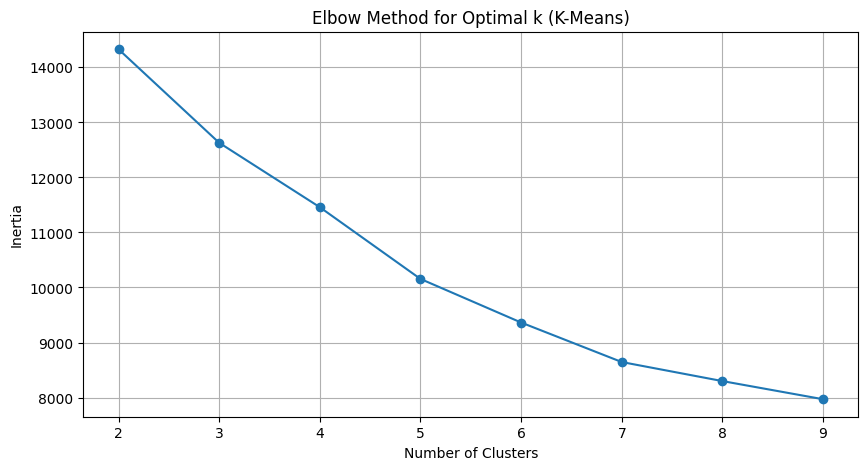

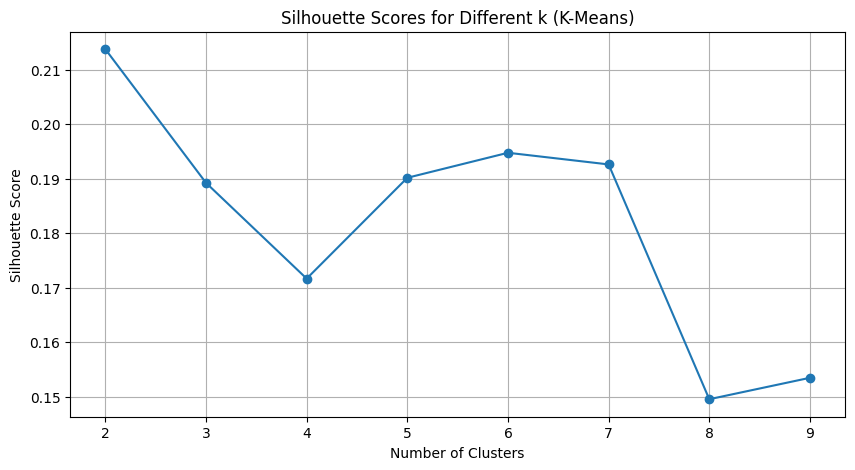

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [22]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Determine optimal number of clusters using the Elbow Method
inertia = []
silhouette_scores = []

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(wine_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(wine_scaled, kmeans.labels_))

# Plotting the Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(range(2, 10), inertia, marker='o')
plt.title('Elbow Method for Optimal k (K-Means)')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()

# Plotting Silhouette Scores
plt.figure(figsize=(10, 5))
plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different k (K-Means)')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()

# Fit K-Means with the optimal number of clusters (e.g., 6)
optimal_k = 6
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
wine_clusters = kmeans.fit_predict(wine_scaled)

# Add cluster labels to the original dataset
df['KMeans_Cluster'] = wine_clusters



**Explanation of K-Means Clustering:**

**Elbow Method:** This method helps determine the optimal number of clusters by plotting the inertia (within-cluster sum of squares) against the number of clusters. The point where the rate of decrease sharply changes is the "elbow," indicating the optimal number of clusters. From the graph, the sharpest decrease in inertia occurs from 2 to 5 clusters. After 5 clusters, the rate of inertia decrease slows down, forming an "elbow" around k = 5.

Optimal k = 5 is likely the best choice because it balances the trade-off between too few and too many clusters. Adding more clusters beyond this point offers diminishing returns in terms of inertia reduction.

**Silhouette Score:** This score measures how similar an object is to its own cluster compared to other clusters. A higher silhouette score indicates better-defined clusters. The silhouette score measures how similar each point is to its own cluster (cohesion) compared to other clusters (separation). Based on this silhouette score graph, k = 5 or k = 6 seems to offer a balance between cluster separation and cohesion, as the scores stabilize and don't drop drastically after these points.

**Strengths:** K-Means is efficient and works well with spherical clusters. It’s easy to implement and interpret.

**Limitations:** It requires specifying the number of clusters beforehand and is sensitive to outliers.

## Comparing other models

### DBSCAN Clustering

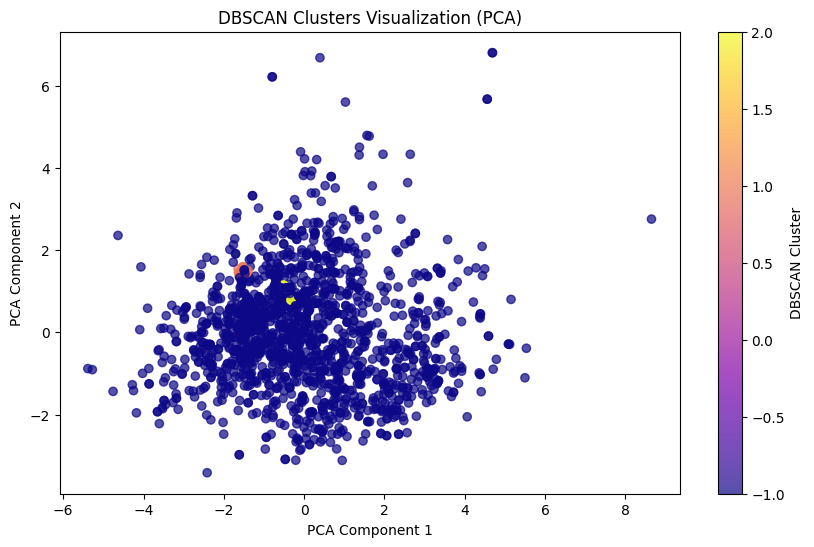

Number of DBSCAN clusters: 3


In [24]:
from sklearn.cluster import DBSCAN

# Fit DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(wine_scaled)

# Add DBSCAN cluster labels to the dataset
df['DBSCAN_Cluster'] = dbscan_labels

# Visualize DBSCAN clusters using PCA
pca = PCA(n_components=2)
wine_pca = pca.fit_transform(wine_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(wine_pca[:, 0], wine_pca[:, 1], c=dbscan_labels, cmap='plasma', marker='o', alpha=0.7)
plt.title('DBSCAN Clusters Visualization (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='DBSCAN Cluster')
plt.show()

# Count number of clusters found
n_dbscan_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
print(f"Number of DBSCAN clusters: {n_dbscan_clusters}")


**Explanation of DBSCAN Clustering:**

**DBSCAN:** Density-Based Spatial Clustering of Applications with Noise is effective for identifying clusters of varying shapes and sizes. It groups points that are closely packed together, marking points in low-density regions as outliers. In this graph, it looks like DBSCAN identified a large central cluster, with some peripheral points classified either as noise or separate, smaller clusters.

**Parameters:** eps defines the maximum distance between two samples for them to be considered as in the same neighborhood, and min_samples is the minimum number of points required to form a dense region.

**Strengths:** It can discover clusters of arbitrary shapes and is robust to outliers. It does not require the number of clusters to be specified.

**Limitations:** Choosing appropriate values for eps and min_samples can be challenging, and it may struggle with varying cluster densities.

### Hierarchical Clustering

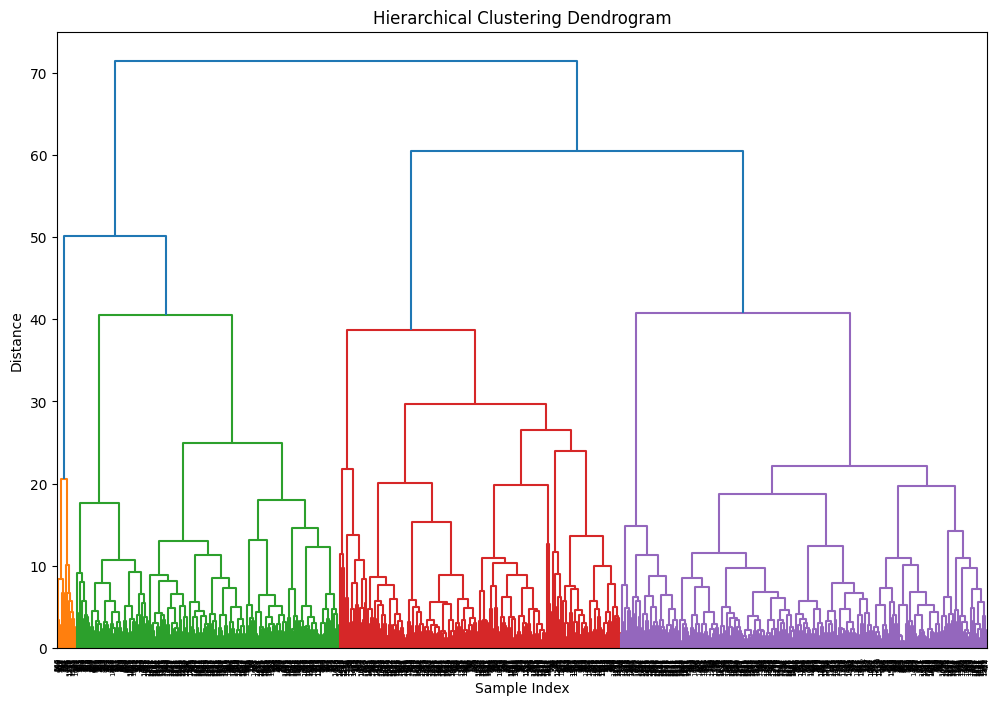

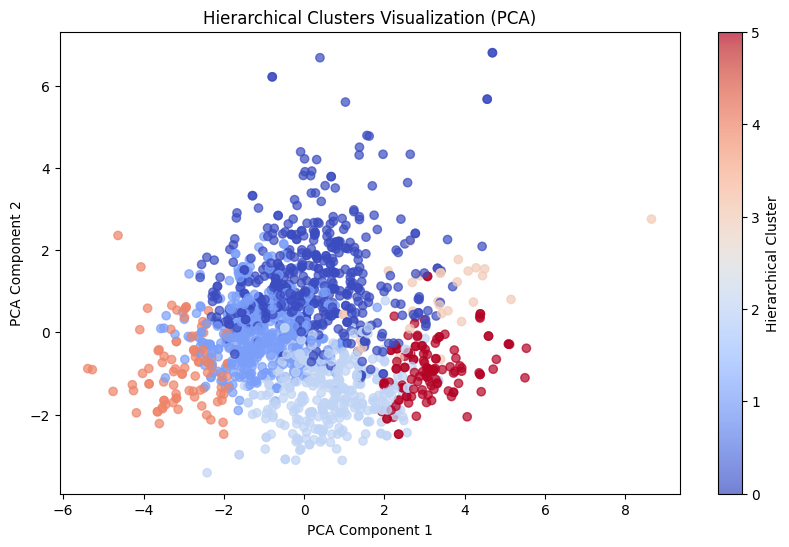

In [25]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Fit Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=optimal_k)
hierarchical_labels = hierarchical.fit_predict(wine_scaled)

# Add hierarchical cluster labels to the dataset
df['Hierarchical_Cluster'] = hierarchical_labels

# Create a dendrogram
linkage_matrix = linkage(wine_scaled, method='ward')
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# Visualize Hierarchical Clusters using PCA
plt.figure(figsize=(10, 6))
plt.scatter(wine_pca[:, 0], wine_pca[:, 1], c=hierarchical_labels, cmap='coolwarm', marker='o', alpha=0.7)
plt.title('Hierarchical Clusters Visualization (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Hierarchical Cluster')
plt.show()


**Explanation of Hierarchical Clustering:**

**Agglomerative Clustering:** This method builds clusters by merging data points based on their proximity. It starts with each point as its own cluster and iteratively merges the closest pairs.

**Dendrogram:** The dendrogram provides a visual representation of the cluster merging process. You can choose the number of clusters by cutting the dendrogram at a specified distance.

**Strengths:** It does not require prior knowledge of the number of clusters and can provide insights into the data's structure through the dendrogram.

**Limitations:** Hierarchical clustering can be computationally intensive for large datasets and is sensitive to noise and outliers.

The plot shows how different clusters are separated or grouped in this PCA-reduced space. You can observe that certain clusters (e.g., in red and light blue) are more compact, while the largest cluster (dark blue) is spread across the plot.

### Model Comparison
Comparing Clustering Results
Now, let’s compare the performance of the three clustering models using the Silhouette Score and the number of clusters.


In [26]:
from sklearn.metrics import silhouette_score

# Silhouette Scores
kmeans_silhouette = silhouette_score(wine_scaled, wine_clusters)
dbscan_silhouette = silhouette_score(wine_scaled, dbscan_labels) if n_dbscan_clusters > 1 else -1
hierarchical_silhouette = silhouette_score(wine_scaled, hierarchical_labels)

print(f"K-Means Silhouette Score: {kmeans_silhouette}")
print(f"DBSCAN Silhouette Score: {dbscan_silhouette}")
print(f"Hierarchical Silhouette Score: {hierarchical_silhouette}")

# Summary of Clustering Results
summary_df = pd.DataFrame({
    'Model': ['K-Means', 'DBSCAN', 'Hierarchical'],
    'Number of Clusters': [optimal_k, n_dbscan_clusters, optimal_k],
    'Silhouette Score': [kmeans_silhouette, dbscan_silhouette, hierarchical_silhouette]
})

print(summary_df)


K-Means Silhouette Score: 0.19472922935137707
DBSCAN Silhouette Score: -0.250511920445793
Hierarchical Silhouette Score: 0.14950267249567725
          Model  Number of Clusters  Silhouette Score
0       K-Means                   6          0.194729
1        DBSCAN                   3         -0.250512
2  Hierarchical                   6          0.149503


## Conclusion

**1. K-Means Clustering:**

* Number of Clusters: 6

* Silhouette Score: 0.1947

* **Interpretation:** The silhouette score of 0.1947 indicates that while K-Means formed 6 clusters, the separation between these clusters is weak. A score closer to 0 suggests that some clusters may be overlapping or not well-defined, indicating that while K-Means provides a framework for clustering, the quality of the clusters in this particular case is limited.

**2. DBSCAN Clustering:**

* Number of Clusters: 3

* Silhouette Score: -0.2505

* **Interpretation:** The negative silhouette score of -0.2505 indicates that DBSCAN struggled significantly with this dataset. A negative score typically implies that the points are likely closer to points in other clusters than to their own, suggesting poor clustering performance. This could be due to inappropriate parameter settings (eps and min_samples) for the data density, resulting in ineffective separation of clusters.

**3. Hierarchical Clustering:**

* Number of Clusters: 6

* Silhouette Score: 0.1495

* **Interpretation:** Hierarchical clustering yielded a silhouette score of 0.1495, which is also quite low. This indicates that, while the clusters are somewhat defined, they are not distinct. Like K-Means, this suggests some overlap or ambiguity in the cluster boundaries.

**Overall Insights**

* **K-Means provided the best performance among the three methods**, albeit with a relatively low silhouette score. It suggests that the clusters it generated are better defined compared to the other two methods but still suffer from a lack of clear separation.

* **DBSCAN performed poorly**, as indicated by its negative silhouette score. This suggests that the density-based approach is not suitable for this dataset, possibly due to the data not forming dense regions or the chosen parameters being misaligned with the data's structure.

* Hierarchical clustering, while producing a similar number of clusters as K-Means, also resulted in weak separation, indicated by its low silhouette score. This method provides a useful visual hierarchy of clusters but did not outperform K-Means in this case.

### Recommendations

* K-Means may be the preferred method if the goal is to obtain clusters, but further refinement and exploration of different initializations or cluster numbers may enhance performance. The low silhouette score suggests that examining the data further might uncover reasons for the clustering issues (e.g., noise or overlapping features).

* DBSCAN requires careful tuning of its parameters. Consider experimenting with different values for eps and min_samples to see if the clustering can be improved. If the dataset contains noise, consider preprocessing to remove or mitigate its effects.

* Hierarchical clustering can still be useful for exploratory analysis. The dendrogram can help visualize potential clusters and relationships, guiding further analysis or model selection.

In summary, while K-Means provided the best clustering in this case, all methods indicate challenges in achieving well-separated clusters, suggesting that additional preprocessing or feature engineering might be necessary to improve clustering outcomes.

##**Additional Preprocessing and Feature Engineering**

**Step 1: Outlier Removal**

We'll identify and remove outliers using the Z-score method.

In [28]:
from scipy import stats

# Calculate Z-scores
z_scores = np.abs(stats.zscore(df.iloc[:, :-1]))
wine_data_cleaned = df[(z_scores < 3).all(axis=1)]


**Step 2: Feature Scaling**

We'll scale the cleaned data again.

In [29]:
# Normalize the cleaned features
wine_scaled_cleaned = scaler.fit_transform(wine_data_cleaned.iloc[:, :-1])


**Step 3: Dimensionality Reduction**

We'll apply PCA to reduce the number of dimensions.

In [30]:
# Apply PCA
pca = PCA(n_components=5)  # Reducing to 5 components for better clustering
wine_pca_cleaned = pca.fit_transform(wine_scaled_cleaned)


**Step 4: Re-run Clustering Models**

**K-Means**

In [31]:
# K-Means Clustering
kmeans_cleaned = KMeans(n_clusters=6, random_state=42)
kmeans_labels_cleaned = kmeans_cleaned.fit_predict(wine_pca_cleaned)

# Calculate Silhouette Score
kmeans_silhouette_cleaned = silhouette_score(wine_pca_cleaned, kmeans_labels_cleaned)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


**DBSCAN**


In [32]:
# DBSCAN Clustering
dbscan_cleaned = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels_cleaned = dbscan_cleaned.fit_predict(wine_pca_cleaned)

# Calculate Silhouette Score
n_dbscan_clusters_cleaned = len(set(dbscan_labels_cleaned)) - (1 if -1 in dbscan_labels_cleaned else 0)
dbscan_silhouette_cleaned = silhouette_score(wine_pca_cleaned, dbscan_labels_cleaned) if n_dbscan_clusters_cleaned > 1 else -1


**Hierarchical Clustering**

In [33]:
# Hierarchical Clustering
hierarchical_cleaned = AgglomerativeClustering(n_clusters=6)
hierarchical_labels_cleaned = hierarchical_cleaned.fit_predict(wine_pca_cleaned)

# Calculate Silhouette Score
hierarchical_silhouette_cleaned = silhouette_score(wine_pca_cleaned, hierarchical_labels_cleaned)


**Compare Results**

In [34]:
# Summary of Clustering Results after Preprocessing
summary_cleaned_df = pd.DataFrame({
    'Model': ['K-Means', 'DBSCAN', 'Hierarchical'],
    'Number of Clusters': [6, n_dbscan_clusters_cleaned, 6],
    'Silhouette Score': [kmeans_silhouette_cleaned, dbscan_silhouette_cleaned, hierarchical_silhouette_cleaned]
})

print(summary_cleaned_df)


          Model  Number of Clusters  Silhouette Score
0       K-Means                   6          0.229578
1        DBSCAN                   8         -0.392522
2  Hierarchical                   6          0.197262


## **Conclusion Based on Updated Model Comparison Output**

* **K-Means Clustering:**
The silhouette score of 0.2296 indicates a slight improvement compared to the previous score of 0.1947. While still moderate, this score suggests better-defined clusters than before, implying that the preprocessing steps (such as outlier removal and scaling) contributed positively to the clustering outcomes.

* **DBSCAN Clustering:**
The negative silhouette score of -0.3925 indicates a significant decline in performance for DBSCAN. This suggests that the model is failing to group data points effectively, with many points likely being closer to points in other clusters. This decline could result from inappropriate parameter settings or perhaps a lack of dense regions in the data after preprocessing.

* **Hierarchical Clustering:**
The silhouette score of 0.1973 shows a slight improvement from 0.1495. This score indicates that, while clusters are somewhat defined, there is still notable overlap or ambiguity. The improvements suggest that the preprocessing steps helped clarify some cluster boundaries, but further refinement may be necessary.

**Overall Insights**

* K-Means remains the strongest performer among the three methods, showing the most significant improvement in cluster definition after preprocessing. This supports the idea that K-Means is a suitable choice for this dataset, particularly when the number of clusters is known.

* DBSCAN's performance has worsened, indicating that the changes made during preprocessing may not have suited the density-based nature of this algorithm. It suggests that further investigation into the choice of parameters, especially eps and min_samples, is warranted, as DBSCAN is particularly sensitive to these values.

* Hierarchical clustering shows some improvement, though not enough to surpass K-Means in terms of cluster definition. This method can still be useful for visualizing the structure of the data, and its results can provide insights into how clusters relate to each other.